In [2]:
# Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12,
                 'axes.spines.right': False,
                 'axes.spines.top': False,
                 'axes.linewidth':1.2,
                 'xtick.major.size': 6,
                 'xtick.major.width': 1.2,
                 'ytick.major.size': 6,
                 'ytick.major.width': 1.2,
                 'legend.frameon': False,
                 'legend.handletextpad': 0.1,
                 'figure.figsize': [10.0, 3.0],
                 'svg.fonttype': 'none',
                 'text.usetex': False})

# 1. R/tau vs Temp

In [207]:
temperature_data = pd.read_excel('VO2_data_temperatures.xlsx',header=1)
# temperature_data.head(10)

In [326]:
# Extract relevant variables 

temps = np.array(temperature_data.iloc[1][1::2])
time = np.array(temperature_data['Time'][2:])
resistance_traces = np.array(temperature_data.iloc[2:,1::2]).T
current_traces = np.array(temperature_data.iloc[2:,2::2]).T

resistance_traces[:,0:500] = 30

tau = np.zeros(len(temps))
for i,R in enumerate(resistance_traces):
    tau_R = (1-np.exp(-1)) * R[-1] # value of R at the tau timepoint
    tau[i] = time[np.where(R>tau_R)[0][0]] - 1 # in seconds
    
time_to_insulator = np.zeros(len(temps))
insulator_R = 50
for i,R in enumerate(resistance_traces):
    time_to_insulator[i] = time[np.where(R>insulator_R)[0][0]] -1 # in seconds

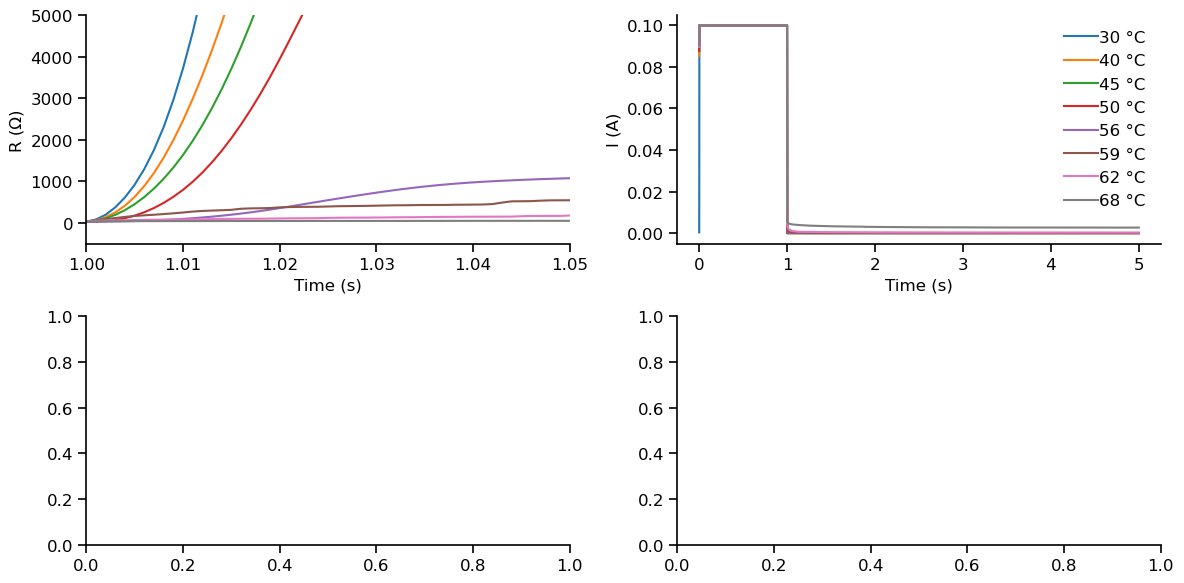

In [331]:
# Plot data 

fig,ax = plt.subplots(2,2,figsize=[12,6])

ax[0,0].plot(time,resistance_traces.T,label=temps)
ax[0,0].set_xlabel('Time (s)')
ax[0,0].set_ylabel('R (Ω)')
ax[0,0].set_xlim([1.,1.05])
# ax[0,0].set_ylim(top=45000)
ax[0,0].set_ylim([-500,5000])
# ax[0,0].set_xlim([0.95,5])

ax[0,1].plot(time,current_traces.T,label=temps)
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_ylabel('I (A)')
# ax[0,1].set_xlim([1.,1.1])
# ax[0,1].set_ylim([0.,0.015])
ax[0,1].legend()
  
# ax[1,0].plot(temps,tau)
# ax[1,0].set_xlabel('Temp (C)')
# ax[1,0].set_ylabel('Tau (s)')

# ax[1,1].plot(temps,time_to_insulator)
# ax[1,1].set_xlabel('Temp (C)')
# ax[1,1].set_ylabel('Time to insulator (s)')
# ax[1,1].set_ylim([0,0.02])


plt.tight_layout()
plt.show()

# 2. R/tau vs current steps

In [184]:
Isteps_data = pd.read_excel('VO2_data_currents.xlsx',header=0)
# Isteps_data.head(10)

In [310]:
# Extract relevant variables 

time = np.array(Isteps_data['Time'][2:])
Isteps = np.array(Isteps_data.iloc[1][1::4])
voltage_traces = np.array(Isteps_data.iloc[2:,1::4]).T
resistance_traces = np.array(Isteps_data.iloc[2:,2::4]).T
current_traces = np.array(Isteps_data.iloc[2:,3::4]).T

tau = np.zeros(len(Isteps))
for i,R in enumerate(resistance_traces):
    tau_R = (1-np.exp(-1)) * (R[-1]-R[0]) # value of R at the tau timepoint
    tau[i] = time[np.where(R>tau_R)[0][0]] # in seconds

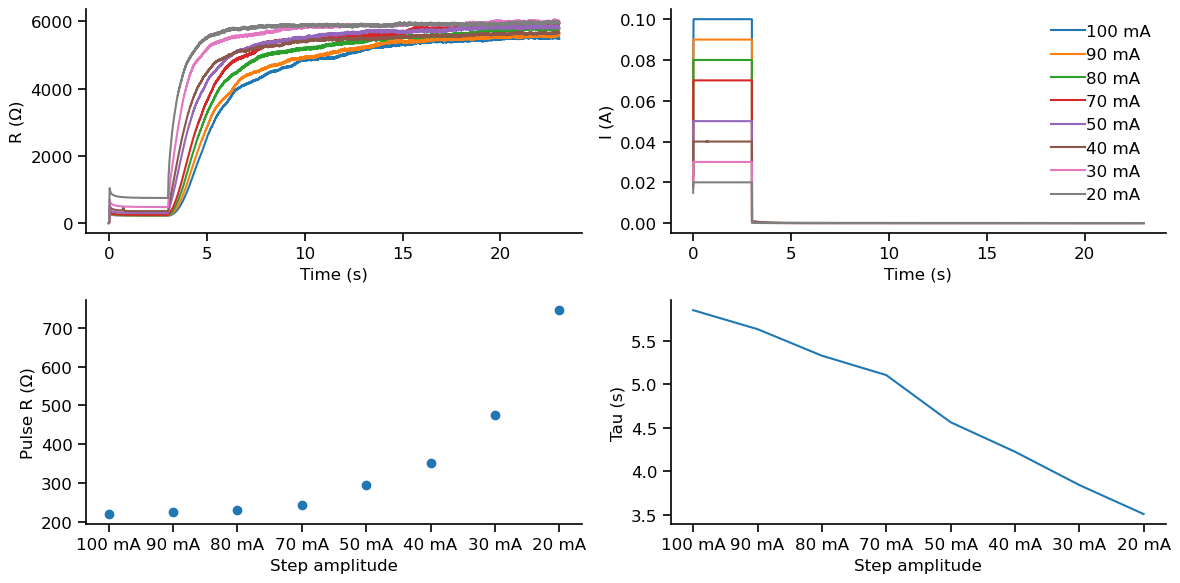

In [311]:
# Plot data 

fig,ax = plt.subplots(2,2,figsize=[12,6])

for i,R in enumerate(resistance_traces):
    ax[0,0].plot(time, R, label=Isteps[i])
ax[0,0].set_xlabel('Time (s)')
ax[0,0].set_ylabel('R (Ω)')
# ax[0,0].set_xlim([1.,1.05])
# ax[0,0].set_ylim(top=5000)
 
for i,I in enumerate(current_traces):
    ax[0,1].plot(time, I, label=Isteps[i])
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_ylabel('I (A)')
ax[0,1].legend()
  
conducting_R = resistance_traces[:,3000]
ax[1,0].scatter(Isteps,conducting_R)
ax[1,0].set_ylabel('Pulse R (Ω)')
ax[1,0].set_xlabel('Step amplitude')

ax[1,1].plot(Isteps,tau)
ax[1,1].set_xlabel('Step amplitude')
ax[1,1].set_ylabel('Tau (s)')

plt.tight_layout()
plt.show()

# 3. R vs V (insulator-metal transition)

In [332]:
RV_data = pd.read_csv('VO2_data_RvsV_transition.csv',header=34)
# RV_data.head(10)

In [333]:
# Extract relevant variables 

time = RV_data['SMU-1 Time (s)']
V = RV_data['SMU-1 Voltage (V)']
I = RV_data['SMU-1 Current (A)']
R = RV_data['SMU-1 Resistance (Ω)']

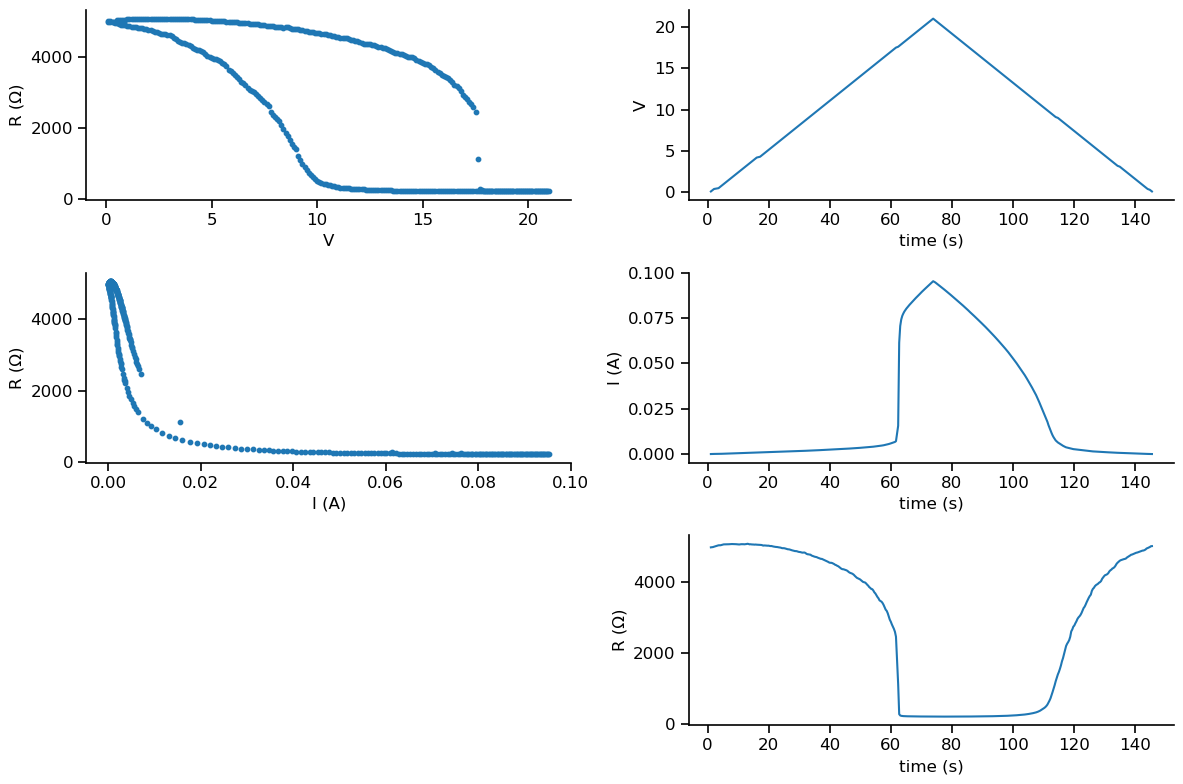

In [334]:
# Plot data 

fig,ax = plt.subplots(3,2,figsize=[12,8])

ax[0,0].scatter(V,R,s=10)
ax[0,0].set_xlabel('V')
ax[0,0].set_ylabel('R (Ω)')

ax[1,0].scatter(I,R,s=10)
ax[1,0].set_xlabel('I (A)')
ax[1,0].set_ylabel('R (Ω)')

ax[0,1].plot(time, V)
ax[0,1].set_xlabel('time (s)')
ax[0,1].set_ylabel('V')

ax[1,1].plot(time, I)
ax[1,1].set_xlabel('time (s)')
ax[1,1].set_ylabel('I (A)')

ax[2,1].plot(time, R)
ax[2,1].set_xlabel('time (s)')
ax[2,1].set_ylabel('R (Ω)')

ax[2,0].axis('off')
plt.tight_layout()
plt.show()

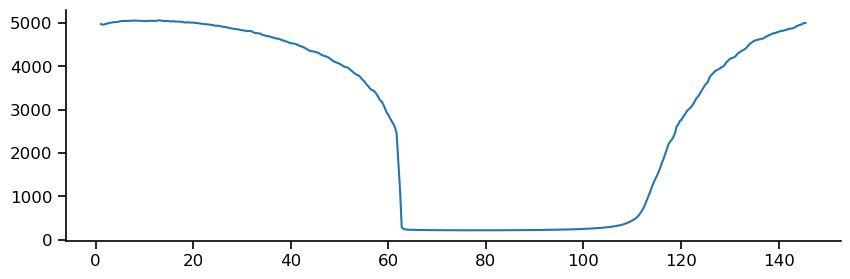

In [336]:
ohm = V/I
plt.plot(time, ohm)
# ax[2,1].set_xlabel('time (s)')
# ax[2,1].set_ylabel('R (Ω)')